# Fetching data from remote sites - https://reurl.cc/exo167

- [COVID-19 Dashboard by JHU](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Taiwan CDC Dashboard](https://sites.google.com/cdc.gov.tw/2019ncov/taiwan)

## Import depencies and libaries

In [1]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure\\'
covid_dir = groot_dir + 'covid19\\'
dataroot_dir = groot_dir

gfigure = lambda name: figure_dir + name + '.png'

output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)

def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)
    
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
TITANIC_TRAIN = '1PrxmUKRQWSlYgtMU13l1E0ob4hVJI20O'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('ML project #1 - how to fetch date from remote site')
print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('\nData storage points to ==>', groot_dir)
 
print('\nLibraries and dependenciess imported')
print_now()

ML project #1 - how to fetch date from remote site

Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\

Libraries and dependenciess imported
2021-06-13 19:05:41.411284


## helpers for fetching remote files

import requests

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)


def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
print('helpers imported')
print_now()   

# ① Fetch files by gdown or requests 

## 1.1 - Download JHU CSSE data files (下載 JHU 每日更新資料)

- [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Data on Github](https://bit.ly/2Alrmgp)

In [2]:
# shorten_jhu_github = https://bit.ly/2Alrmgp

github = JHU_CSSE

csv_holder = 'time_series_covid19_%s_global.csv'

csvlist = ['confirmed', 'deaths', 'recovered']

jhudata = lambda x: csv_holder % x

put_data_here = os.path.join(groot_dir, 'covid19') + '\\'

print('defintion loaded')
print_now()

defintion loaded
2021-06-13 19:05:43.569488


if not os.path.exists(groot_dir):
    os.mkdir(groot_dir)

if not os.path.exists(groot_dir + "covid19\\"):
    os.mkdir(groot_dir + "covid19\\")

In [3]:
for dfile in csvlist:
    url = github + jhudata(dfile)
    dled = fetch_file_via_requests(url, put_data_here)
    localname = dled.split("/")[-1]
    print(f"{localname:s} feetched")

print("\nall file fetched")
print_now()

C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_confirmed_global.csv feetched
C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_deaths_global.csv feetched
C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_recovered_global.csv feetched

all file fetched
2021-06-13 19:05:46.413031


## 1.2 - Take a look at the downloaded files

* 分別從 covid_dir 中載入確診(confirmed)、死亡(deaths)及康復(recovered)三組數據

In [4]:
csv_file = [f'time_series_covid19_{x}_global.csv' for x in ['confirmed', 'deaths', 'recovered']]

In [18]:
df = pd.read_csv(os.path.join(covid_dir, csv_file[0]))
death = pd.read_csv(os.path.join(covid_dir, csv_file[1]))
recovered = pd.read_csv(os.path.join(covid_dir, csv_file[2]))
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1262,1263,1263,1263,1263,1263,1263,1263,1263,1263
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,3884447,3915397,3939024,3955439,3977634,4008771,4038528,4066156,4093090,4111147
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,222978,223050,223143,223180,223212,223285,223384,223460,223555,223643
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5590,5590,5595,5600,5605,5607,5610,5611,5612,5613


* 以 str.contains 找出 Taiwan 並正名之(loc)

In [19]:
df[df["Country/Region"].str.contains("Taiwan")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
242,NaN,Taiwan*,23.7,121.0,1,1,3,3,4,5,...,9974,10446,10956,11298,11491,11694,11968,12222,12500,12746


In [20]:
df.loc[df["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"

In [21]:
df[df["Country/Region"] == "Taiwan"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
242,NaN,Taiwan,23.7,121.0,1,1,3,3,4,5,...,9974,10446,10956,11298,11491,11694,11968,12222,12500,12746


In [22]:
# 同步修正 death & Recovered
death.loc[death["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"
recovered.loc[recovered["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"

## 1.3 - Select required contents from JHU data

### 1.3.1 Worldwide statistics

* 全球每日確認加總並繪製折線圖

In [24]:
world = df.iloc[:, 4:].sum()
world

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
6/8/21     173997437
6/9/21     174416271
6/10/21    174865276
6/11/21    175286322
6/12/21    175658224
Length: 508, dtype: int64

* Pandas快速繪出折線圖

### 1.3.2 How to select required rows

* 篩選出台灣的所有數據

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21
242,NaN,Taiwan,23.7,121.0,1,1,3,3,4,5,...,6091,6761,7315,7806,8160,8511,8842,9389,9974,10446


* 取出 Taiwan 純數據欄位 (iloc)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21
242,1,1,3,3,4,5,8,8,9,10,...,6091,6761,7315,7806,8160,8511,8842,9389,9974,10446


* 取出所有 United Kingdom 所有數據

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
5/31/21    4503231
6/1/21     4506333
6/2/21     4510597
6/3/21     4515778
6/4/21     4521922
Length: 500, dtype: int64

* 取出所有 China 數據

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21
58,1,9,15,39,60,70,106,152,200,237,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
59,14,22,36,41,68,80,91,111,114,139,...,1059,1059,1059,1059,1059,1059,1059,1060,1061,1063
60,6,9,27,57,75,110,132,147,182,211,...,598,598,598,598,598,598,598,598,598,598
61,1,5,10,18,35,59,80,84,101,120,...,617,617,618,620,621,621,624,625,625,628
62,0,2,2,4,7,14,19,24,26,29,...,194,194,194,194,194,194,194,194,194,194
63,26,32,53,78,111,151,207,277,354,436,...,2427,2428,2431,2432,2455,2468,2481,2498,2509,2525
64,2,5,23,23,36,46,51,58,78,87,...,275,275,275,275,275,275,275,275,275,275
65,1,3,3,4,5,7,9,9,12,29,...,147,147,147,147,147,147,147,147,147,147
66,4,5,8,19,22,33,40,43,46,52,...,188,188,188,188,188,188,188,188,188,188
67,1,1,2,8,13,18,33,48,65,82,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317


* 取出中共國各省每日確診加總

1/22/20       548
1/23/20       643
1/24/20       920
1/25/20      1406
1/26/20      2075
            ...  
5/31/21    103014
6/1/21     103045
6/2/21     103069
6/3/21     103094
6/4/21     103119
Length: 500, dtype: int64

* 建立副程式，方便計算
0. selected_rows
1. country_rows(c)
2. active_data(c)
3. country_df(c)

## 1.4 - Investigate Data

* 繪製全球確診人數加總折線圖

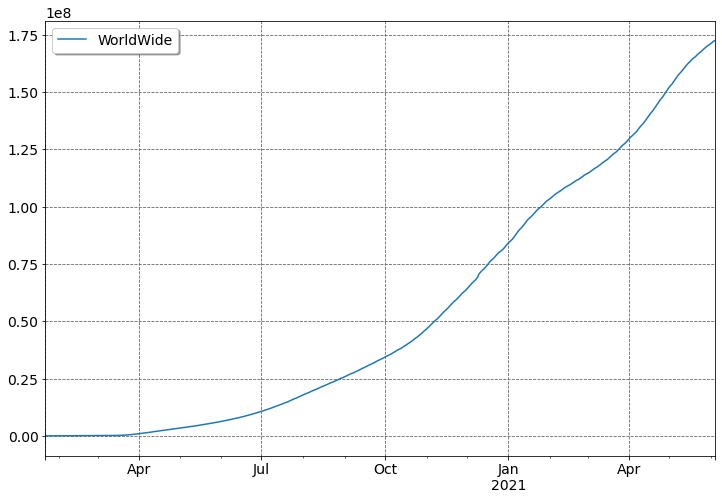

### 1.4.1 pandas plot

* 確認清單中3個國家 "Korea, South", "Taiwan", "Japan"

In [37]:
watch_list = ["Korea, South", "Taiwan", "Japan"]

* 嘗試使用 pandas直接輸出圖表

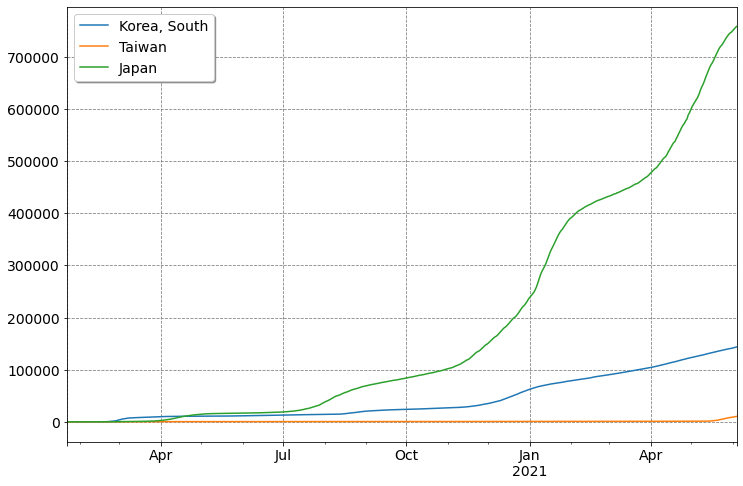

* 嘗試使用 seaborn 輸出圖表

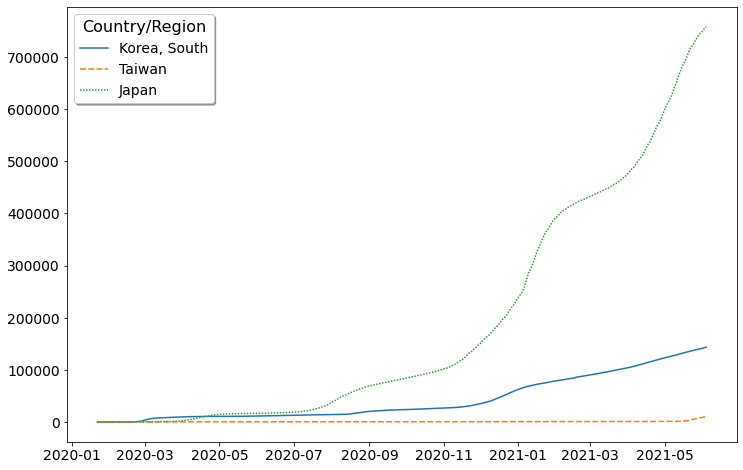

### 1.4.2 matplotlib pyplot

* 嘗試使用 matplotlib.pyplot 輸出圖表
* 搭配 ax.set_xticks & ax.set_xticklabels

[Text(0, 0, '1/22/20'),
 Text(60, 0, '3/22/20'),
 Text(120, 0, '5/21/20'),
 Text(180, 0, '7/20/20'),
 Text(240, 0, '9/18/20'),
 Text(300, 0, '11/17/20'),
 Text(360, 0, '1/16/21'),
 Text(420, 0, '3/17/21'),
 Text(480, 0, '5/16/21')]

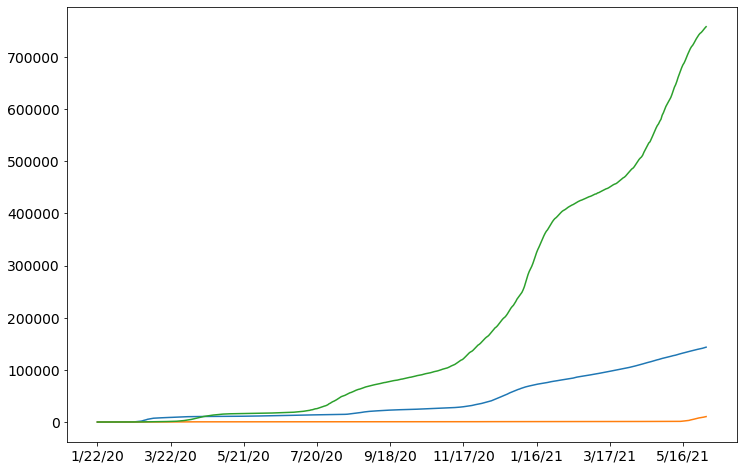

## 1.5 - Plot Practice: Active Trend

- [seaborn set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)
- [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
- [sns.reset_defaults()](https://seaborn.pydata.org/generated/seaborn.reset_defaults.html?highlight=reset#seaborn.reset_defaults) 

### 1.5.1 pandas.plot.line() 

* 以 function: country_df 取出台灣染疫數據

,Taiwan,Active
2020-01-22,1,1
2020-01-23,1,1
2020-01-24,3,3
2020-01-25,3,3
2020-01-26,4,4
...,...,...
2021-05-31,8511,7254
2021-06-01,8842,7572
2021-06-02,9389,8107
2021-06-03,9974,8675


* 副程式 - 加速圖表繪製 (active_trend)

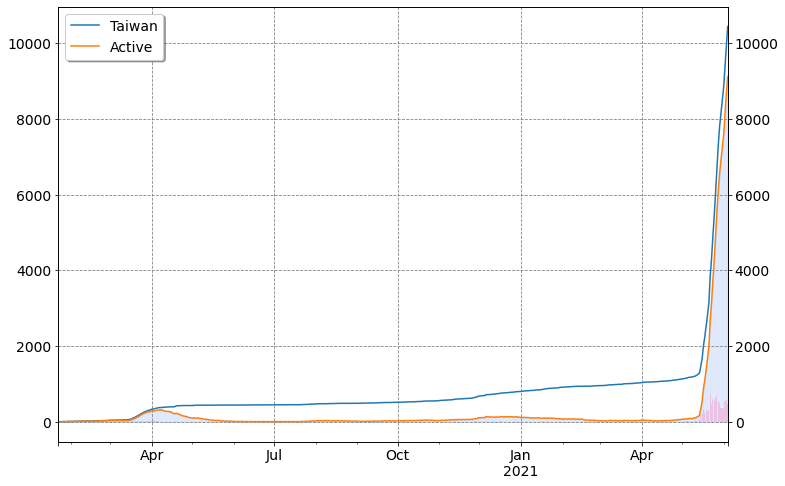

### 1.5.2 seaborn

* 副程式 - 使用 seaborn 加速輸出圖表

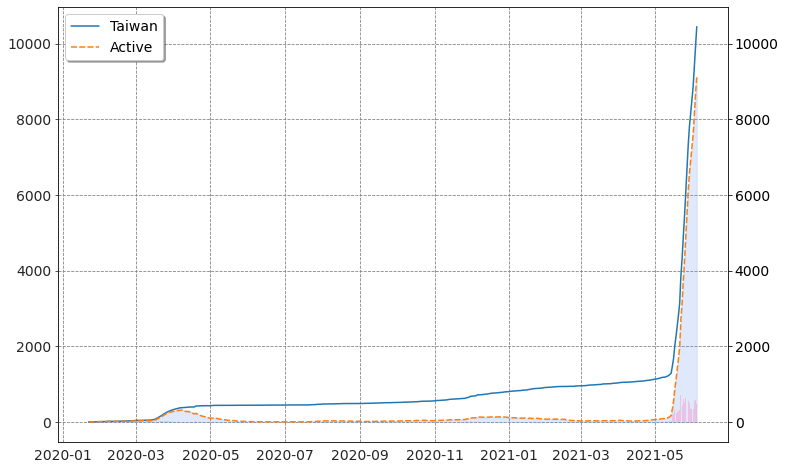

## 1.6 New Case Trend

* 算出台灣每日確診數

2020-01-22      NaN
2020-01-23      0.0
2020-01-24      2.0
2020-01-25      0.0
2020-01-26      1.0
              ...  
2021-05-31    351.0
2021-06-01    331.0
2021-06-02    547.0
2021-06-03    585.0
2021-06-04    472.0
Name: Taiwan, Length: 500, dtype: float64

* 建立副程式 - 繪製多日確診累積數 (new_confirmed_trend)

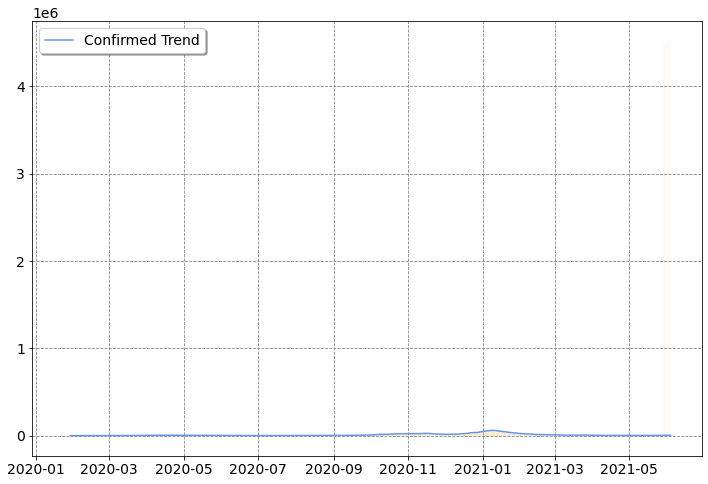

# ② Manual Works

## 2.1 - Taiwan.csv

- [疫情數據全報導](https://udn.com/news/COVID19)：此報導會每日更新網頁內容
- [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

**補充說明：**

根據 2020-08-01 衛生福利部疾病管制署記者會公佈資料：

> 指揮中心統計，國內截至目前累計81,826例(含80,728例排除)，其中474例確診，分別為382例境外移入，55例本土病例、36例敦睦艦隊及1例待釐清。

因此 taiwan.csv 需資料增加一個欄位 tbd (to_be_decided)，新的版本更名為 taiwan_aug.csv，以下使用的範例資料檔案，為更名前的最後一個檔案，因此資料到 2020-07-31 為止。

# 下載最後一個舊版 taiwan.csv 

fetch_file_via_requests(
    DropboxLink('upr5klwy07bba3h', 'tawiwan.csv'), covid_dir
)

* 讀取 Taiwan.csv

,Taiwan,Local,Imported,Deaths,Recovered,Panshi,Active
date,,,,,,,
2020-01-22,1,0,1,0,0,0,1
2020-01-23,1,0,1,0,0,0,1
2020-01-24,3,0,3,0,0,0,3
2020-01-25,3,0,3,0,0,0,3
2020-01-26,4,0,4,0,0,0,4


## 2.2 Trending Chart

* 繪製趨勢圖

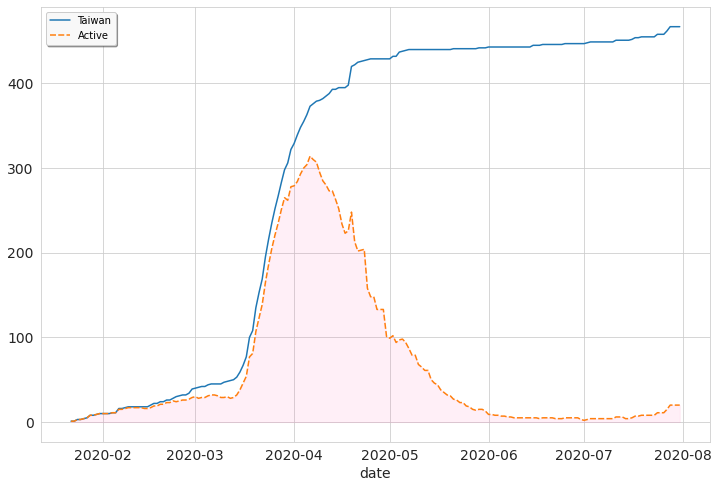

## 2.3 - Daily Cases

* 建立新的 DataFrame 匯入每日各指標新增數量

,Taiwan,Local,Imported,Panshi
date,,,,
2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,2.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,1.0,0.0,1.0,0.0
2020-01-27,1.0,0.0,1.0,0.0
...,...,...,...,...
2020-07-27,4.0,0.0,4.0,0.0
2020-07-28,5.0,0.0,5.0,0.0
2020-07-29,0.0,0.0,0.0,0.0


* 繪製趨勢圖 Bar chart

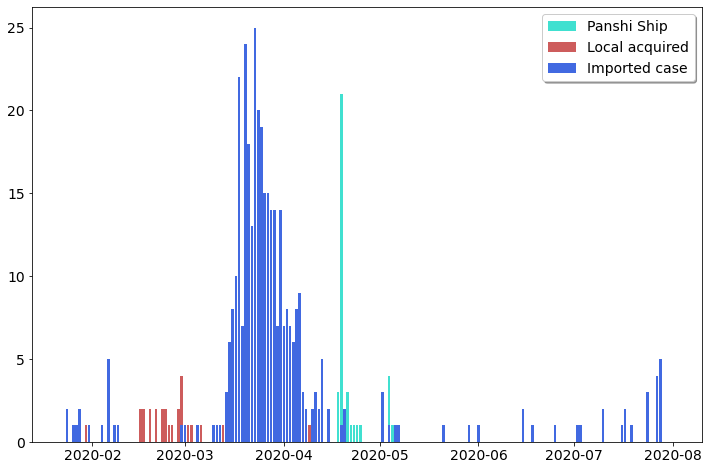

## 2.4 - Complicated tw_newcase()

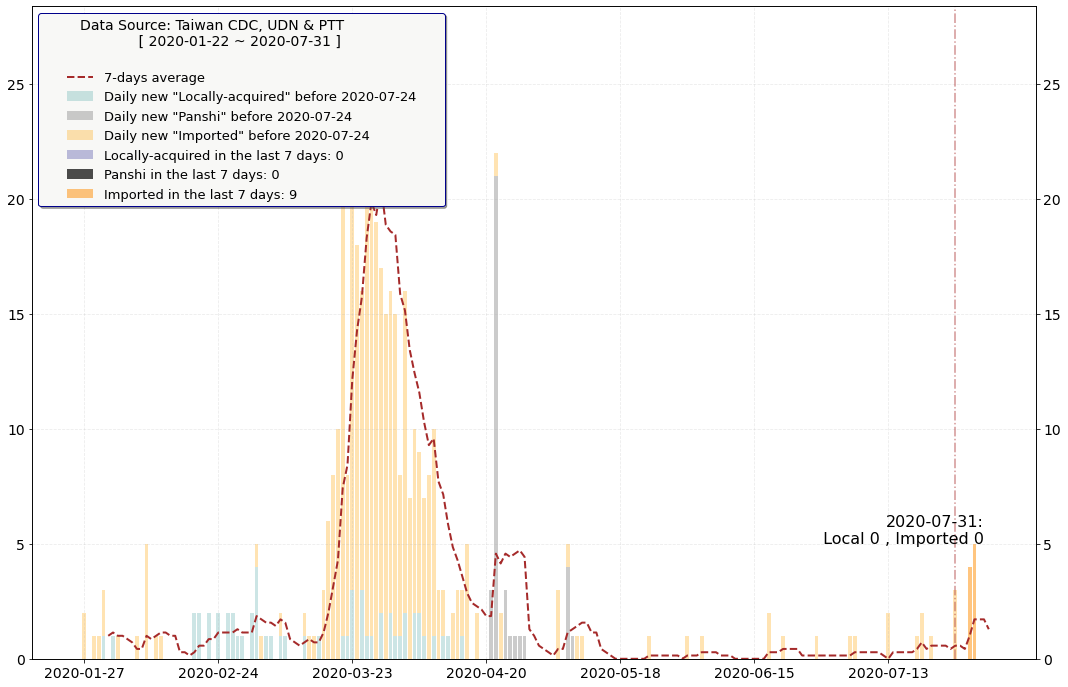

In [98]:
def tw_newcase():

    dsource = u'Data Source: Taiwan CDC, UDN & PTT'
    durl = 'https://bit.ly/3dj7zgg, https://bit.ly/33AQlGr & https://reurl.cc/xZgqA5'

    ddate = '[ %s ~ %s ]' %  \
        (str(tdf.index[0]).split(' ')[0] , str(tdf.index[-1]).split(' ')[0])    
    to_watch = 'Taiwan'
    window_size = 1
    
    new_confirmed = tdf[to_watch].diff(1)
    r7 = tdf[to_watch].diff(1).rolling(7).mean()

    fig, ax = plt.subplots(figsize = (18, 12))

    ax.bar(tdf.index[window_size:-7], tdf.Local.diff(1)[window_size:-7], 
        label = 'Daily new "Locally-acquired" before %s' % str(tdf.index[-8]).split(' ')[0], 
        color = 'teal' , alpha = 0.2)
    
    ax.bar(tdf.index[window_size:-7], tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Panshi" before %s' % str(tdf.index[-8]).split(' ')[0], 
        bottom = tdf.Local.diff(1)[window_size:-7],
        color = 'darkgray' , alpha = 0.6)   
    
    ax.bar(tdf.index[window_size:-7], tdf.Imported.diff(1)[window_size:-7], 
        bottom = tdf.Local.diff(1)[window_size:-7] + tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Imported" before %s' % str(tdf.index[-8]).split(' ')[0], 
        alpha = 0.3, color = 'orange')
    
    ax.bar(tdf.index[-7:], tdf.Local.diff(1)[-7:],  
        label = 'Locally-acquired in the last 7 days: %d' % \
        ( tdf.Local[-1] - tdf.Local[-8]),
        color = 'navy' , alpha = 0.25)
    
    ax.bar(tdf.index[-7:], tdf.Panshi.diff(1)[-7:],  
        label = 'Panshi in the last 7 days: %d' % \
        ( tdf.Panshi[-1] - tdf.Panshi[-8]),
        bottom = tdf.Local.diff(1)[-7:],
        color = 'black' , alpha = 0.7)
    
    ax.bar(tdf.index[-7:], tdf.Imported.diff(1)[-7:], 
        label = 'Imported in the last 7 days: %d' % \
        ( tdf.Imported[-1] - tdf.Imported[-8]),
        bottom = tdf.Local.diff(1)[-7:] + tdf.Panshi.diff(1)[-7:], alpha = 0.5, color = 'darkorange')

    ax.plot(r7, color = 'brown', lw = 2, ls = '--', label = '7-days average')
    ax.axvline(x = tdf.index[-8], ls = '-.', color = 'brown', alpha = 0.5)
    # ax.plot(tdf.Taiwan.diff(1)[window_size:], color = 'blue', alpha = 0.75)

    ax.legend( loc = 'upper left', frameon = True, shadow = True, 
        facecolor = '#f8f8f6', 
        edgecolor = 'darkblue',
        title = '{:^50}\n{:^70}\n'.format(dsource, ddate), title_fontsize = 14,
        # title = '{:^60}\n{:^60}\n{:^90}\n'.format(dsource, durl, ddate), title_fontsize = 13,
        fontsize = 13)
    ax.grid (b = 'on', which = 'major', alpha = 0.25, ls = '--')
    xticks_locataion = [tdf.index[x] for x in range(2, len(tdf.index), 28)]
    xticks_labels = [str(tdf.index[i].date()) for i in range(5, len(tdf.index), 28)]
    ax.set_xticks(xticks_locataion)
    ax.set_xticklabels(xticks_labels)    
    ax2 = ax.twinx()
    ylim = ax.get_ylim()  
    ax2.set_ylim(ylim)
    ax2.text(tdf.index[-2], tdf.Taiwan.diff(1)[-1]+5, '%s:\n Local %d , Imported %d' % 
        ((str(tdf.index[-1]).split(' ')[0]), tdf.Local.diff(1)[-1], tdf.Imported.diff(1)[-1]),
        fontsize = 16, ha = 'right')
    
tw_newcase()